In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\Avirup\\Documents\\Python_datasets\\SampleSuperstore.csv")
df['Gross Profit']=((df['Profit']/df['Sales'])*100)

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Gross Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Gross Profit    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
 13  Gross Profit  9994 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Gross Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,12.031393
std,32063.693350,623.245101,2.225110,0.206452,234.260108,46.675435
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,7.500000
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,27.000000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,36.250000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,50.000000


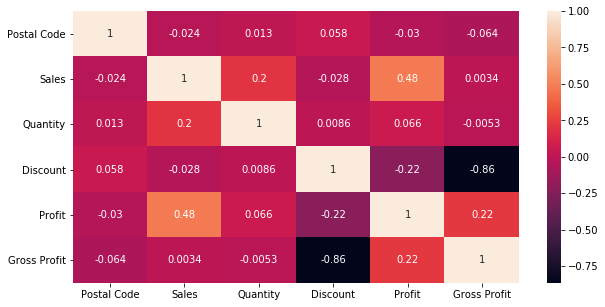

In [7]:
correlation=df.corr()
plt.figure(figsize=(10,5))
sea.heatmap(correlation,annot=True)

In [8]:
df2=df.drop(['Country','Postal Code','Quantity','Discount'],axis=1)
df2.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Profit,Gross Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,41.9136,16.00
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,219.5820,30.00
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,6.8714,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,-383.0310,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2.5164,11.25


Text(0.5, 1.0, 'Category -- Region wise')

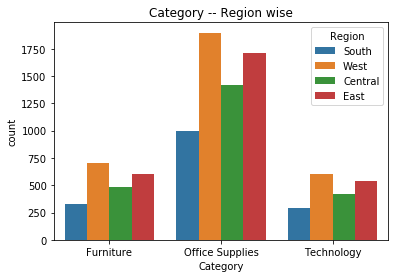

In [9]:
sea.countplot(x='Category',hue='Region',data=df2)
plt.title("Category -- Region wise")

Text(0.5, 1.0, 'Sub-Category -- Region wise')

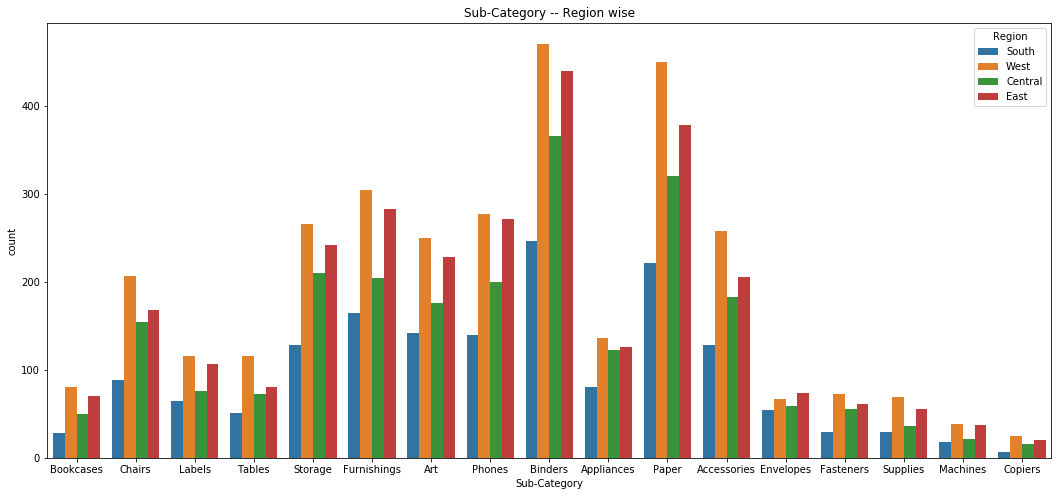

In [10]:
plt.figure(figsize=(18,8))
sea.countplot(x='Sub-Category',hue='Region',data=df2)
plt.title("Sub-Category -- Region wise")

Text(0.5, 1.0, 'Sales Vs Profits -- Segment wise')

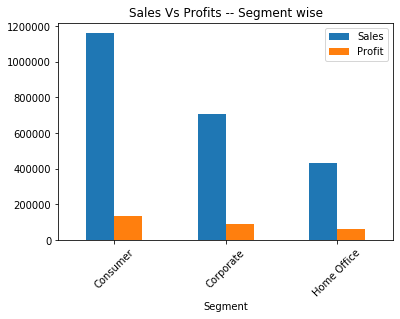

In [11]:
df2.groupby(['Segment']).sum()[['Sales','Profit']].plot.bar()
plt.xticks(rotation=45)
plt.title("Sales Vs Profits -- Segment wise")

Text(0.5, 1.0, 'Sales Vs Profits -- Ship Mode wise')

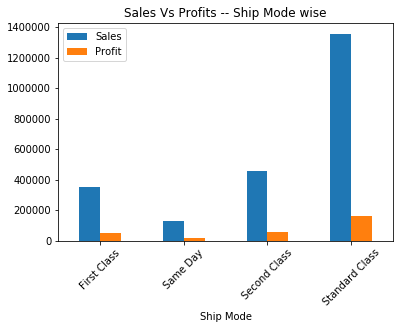

In [12]:
df2.groupby(['Ship Mode']).sum()[['Sales','Profit']].plot.bar()
plt.xticks(rotation=45)
plt.title("Sales Vs Profits -- Ship Mode wise")

Text(0.5, 1.0, 'Gross Profits -- State wise')

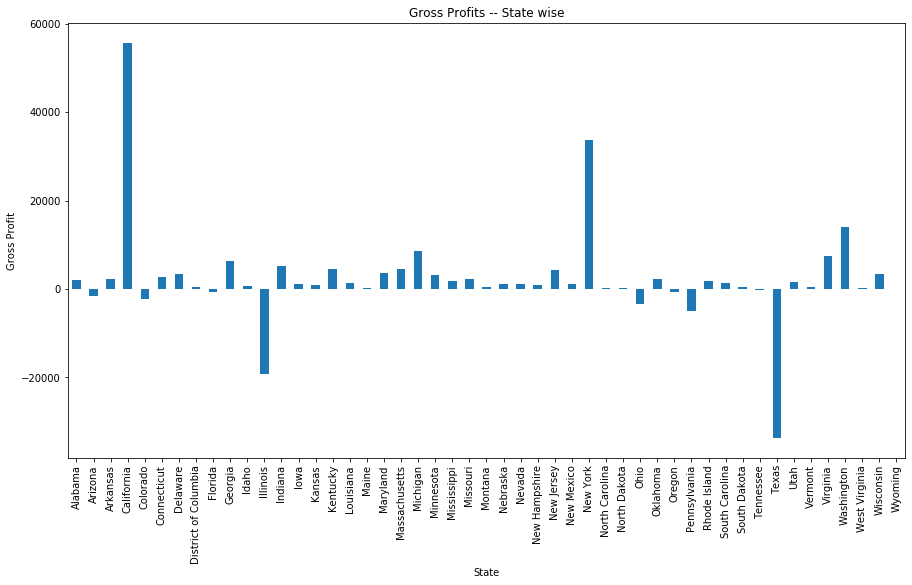

In [13]:
plt.figure(figsize=(15,8))
df2.groupby(['State']).sum()['Gross Profit'].plot.bar()
plt.xticks(rotation=90)
plt.ylabel("Gross Profit")
plt.title("Gross Profits -- State wise")

Text(0.5, 1.0, '20 Cities with highest Gross Profits')

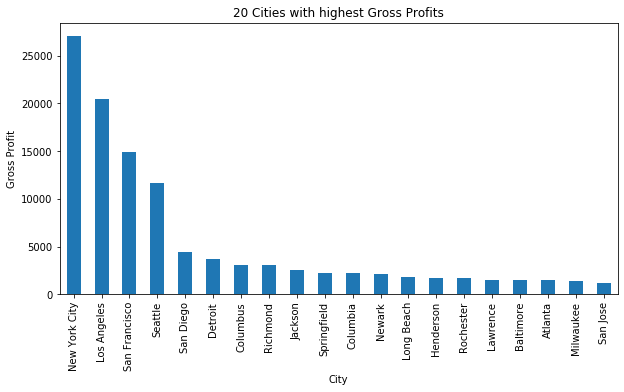

In [14]:
plt.figure(figsize=(10,5))
df2.groupby(['City']).sum()['Gross Profit'].sort_values(ascending=False).head(20).plot.bar()
plt.ylabel("Gross Profit")
plt.title("20 Cities with highest Gross Profits")